<h1>Аналіз та обробка БМД</h1>
<h2>БС-82</h2>
<h3 style="font-family:sans-serif;">Микита Любшин<h3>
  <link rel ="stylesheet" href="style.css"></link>
    <h4>Робота 7</h4>

<h2>Про дані</h2>
Були обрані реальні дані з kaggle, що містять дані про молодих людей у Братиславі. Далі, за кількісну змінну було взято любов до предмету "Правознавство" кожного індивіду. За категоріальну змінну - стать людини.

Нульовою гіпотезою в даному дослідженні було обрано рівність середніх любові до предмету "Правознавство" у жінок та чоловіків. Альтернативною гіпотезою відповідно нерівність середніх даного параметру.

<h2>Виконання</h2>

In [105]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro
%matplotlib inline

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані повинні відповідати вимогам

In [106]:
data = pd.read_csv("static/responses.csv",encoding = 'utf-8')
data = data.iloc[:, lambda data: [144, 45]]
data

,Gender,Law
0,female,1.0
1,female,2.0
2,female,3.0
3,female,5.0
4,female,2.0
...,...,...
1005,female,1.0
1006,male,1.0
1007,female,1.0
1008,female,1.0


<h4>2. Побудувати графік, що відображає розкид даних в групах.</h4>

150  150


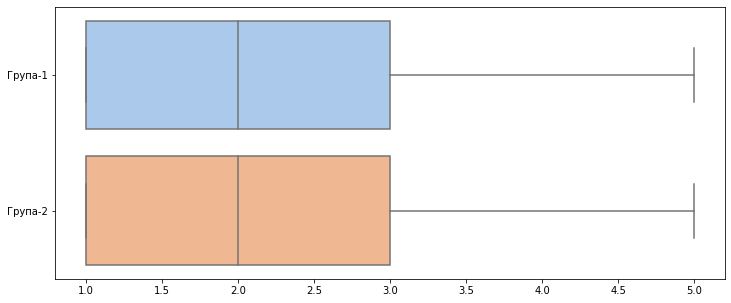

In [178]:
def get_group(data, crit):
    return list(map( lambda x: x[1], list(filter( lambda x: x[0] == crit , data.values ))))
def filter_group(data):
    return list(map( int ,filter( lambda x: not np.isnan(x), data )))[:150]
group1 = sorted(filter_group( get_group( data, "female" ) ))
group2 = sorted(filter_group( get_group( data, "male" ) ))


print(str(len(group1))+"  "+str(len(group2)))
dataFrame = pd.DataFrame({
     'Група-1': group1,
     'Група-2': group2
})
# dataFrame

fig, ax = plt.subplots(figsize=(12,5))
fig =  sns.boxplot(orient = "h",data = dataFrame, palette="pastel")


<h4>3. Для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant).</h4>

In [179]:
def livens(data):
    df = len(data)-1
    table = pd.read_excel("static/Livens.xlsx",encoding = 'utf-8')    #Livens coef table
    table = table.iloc[
        21 if df > 20 else df,
        12 if df > 20 else 11 if df > 15 else 10 if df > 10 else df
    ]

    std1 = np.std(data.iloc[:,0])
    std2 = np.std(data.iloc[:,1])
    F = std1**2/std2**2 if std1 > std2 else std2**2/std1**2
    significant = "not significant" if F > table else "significant"

    return F,df,significant

def show_livens_student(data, func):
    print(f"Results:\n\tF = {func(*data)[0]}\n\tdf = {func(*data)[1]}\n\tIt is {func(*data)[2]}")
    return func(*data)

In [180]:
res_livens = show_livens_student([dataFrame], livens)

Results:
	F = 1.0968753531472477
	df = 149
	It is significant


<h4>4. Для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).</h4>

In [191]:
def student(data, liv):
    std1 = np.std(data.iloc[:,0])
    std2 = np.std(data.iloc[:,1])
    
    m1 = np.mean(data.iloc[:,0])
    m2 = np.mean(data.iloc[:,1])
    
    n = len(data)
    
    df = 2*n - 2
    table_values= pd.read_excel("static/Students.xlsx",encoding = 'utf-8')    #Students coefs table
    table_val, i = 0, 0
    
    while i < len(table_values) and table_val == 0:
        if(df < int(table_values.iloc[i,0])):
            if(df != table_values.iloc[i-1,0]):
                table_val = (table_values.iloc[i-1,1] if((table_values.iloc[i,0]-df) >= abs(table_values.iloc[i-1,0]-df)) else table_values.iloc[i,1])
            else:
                table_val = table_values.iloc[i-1,1]
        i += 1
    
    t = abs(m1-m2)/np.sqrt(std1**2/n + std2**2/n) if liv[2] == "significant" else abs(m1-m2)/np.sqrt(((n-1)*(std1**2) + (n-1)*(std2**2))/(df)*(2/n))
 
    significant = "significant" if(t < table_val) else "not significant"
    return t,df,significant

student_res = show_livens_student([dataFrame, res_livens], student)


Results:
	F = 1.213796813344988
	df = 298
	It is significant


<h4>5.Перевірити розбіжність на між групами на даних з п. 1.</h4>

In [193]:
table = pd.DataFrame({
    "Критерій Лівені":res_livens,
    "Критерій Стьюдента":student_res
}, index = ["Значення", "ступінь свободи", "Значимість зв'язку"])
table

,Критерій Лівені,Критерій Стьюдента
Значення,1.09688,1.2138
ступінь свободи,149,298
Значимість зв'язку,significant,significant


<h4>6.Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.</h4>

In [194]:
print(f"Дисперсії статистично {'рівні' if table.iloc[2,0] == 'significant' else 'відмінні'}")
print(f"Середні статистично   {'рівні' if table.iloc[2,0] == 'significant' else 'відмінні'}")

Дисперсії статистично рівні
Середні статистично   рівні
